In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

random_state = 123456

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=random_state)

In [5]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

0.9241811870648141


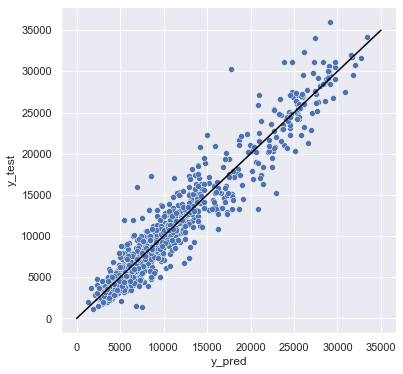

In [7]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train_sc, y_train)
print(model.score(X_test_sc, y_test))
y_pred = model.predict(X_test_sc)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(xlabel='y_pred', ylabel='y_test')
ls = np.linspace(0, 35000, 100)
plt.plot(ls, ls, color='black')
plt.show()

0.01 0.7730633458172188
0.02 0.8845008412142847
0.03 0.9054358563921282
0.04 0.913543964667506
0.05 0.9172681029588077
0.060000000000000005 0.9199397803758317
0.06999999999999999 0.9212679218224707
0.08 0.9217513448685899
0.09 0.9222707426335809
0.09999999999999999 0.9241811870648141
0.11 0.9230142754507392
0.12 0.9218658733436073
0.13 0.9205610955282275
0.14 0.9228774777633768
0.15000000000000002 0.919031382036151
0.16 0.9219512751631002
0.17 0.9184390034545404
0.18000000000000002 0.9200646480786138
0.19 0.9241405156315284
0.2 0.9199126093337999
0.21000000000000002 0.9201008461121457
0.22 0.9196133406941148
0.23 0.9178309552629599
0.24000000000000002 0.9207158429120808
0.25 0.9206090276942018
0.26 0.9121886732293782
0.27 0.9184395389711761
0.28 0.9159737179245547
0.29000000000000004 0.9148762416514006
0.3 0.9113197001961526
0.31 0.9092331897162286
0.32 0.9105842974670845
0.33 0.9096187248302506
0.34 0.9110581283661798
0.35000000000000003 0.9102106565351771
0.36000000000000004 0.904643

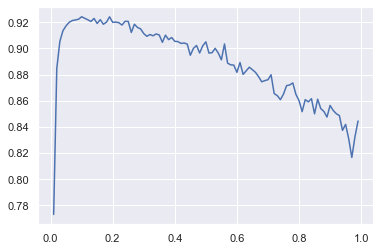

In [11]:
learning_rates = np.arange(0.01, 1, 0.01)
scores = []
best_val = 0
best_score = 0

for learning_rate in learning_rates:
    model = HistGradientBoostingRegressor(learning_rate = learning_rate)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = learning_rate
    print(learning_rate, score)

sns.lineplot(x=learning_rates, y=scores)
plt.show()

2 0.7818136935154613
3 0.8450863242578859
4 0.8749166387439357
5 0.8886529629862634
6 0.8993961735950858
7 0.9057923347551746
8 0.9063064171519216
9 0.910627089090897
10 0.9114650009914524
11 0.9127542958048055
12 0.9158037237953615
13 0.9136964664615289
14 0.9155217242218804
15 0.917992798197285
16 0.9181738633932974
17 0.9191878594585027
18 0.9169175000858125
19 0.9185878787153469
20 0.9198499614159155
21 0.9175676847001588
22 0.9198614203404879
23 0.919539032534852
24 0.9225387235214737
25 0.9205628376415643
26 0.9207277966918901
27 0.9220163168630326
28 0.9221207765256072
29 0.9217807128609778
30 0.923464575550165
31 0.9241811870648141
32 0.9218202502574648
33 0.9238781795468943
34 0.9222401826248036
35 0.9233167385982772
36 0.9222755498435153
37 0.921892985542655
38 0.9240330501513423
39 0.921443540337025
40 0.9212122207380296
41 0.9214752647294219
42 0.9201144956403123
43 0.9243491229529691
44 0.9225281712149069
45 0.9227961996359787
46 0.9228291122524476
47 0.9232829884174073
48

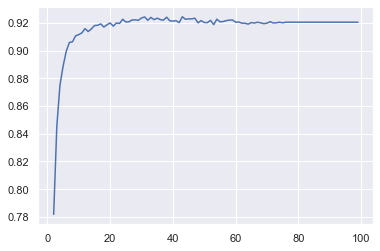

In [13]:
#Bester Wert bei 0.1
max_leaf_nodes = np.arange(2, 100, 1)
scores = []
best_val = 0
best_score = 0

for max_leaf_node in max_leaf_nodes:
    model = HistGradientBoostingRegressor(max_leaf_nodes = max_leaf_node)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = max_leaf_node
    print(max_leaf_node, score)

sns.lineplot(x=max_leaf_nodes, y=scores)
plt.show()
print(best_score, best_val)

1 0.9112998339179877
2 0.910711671821045
3 0.9125147125848496
4 0.9140667494136157
5 0.9163933030529459
6 0.9171990495694264
7 0.9128531756834717
8 0.9173773974260299
9 0.9156004098405228
10 0.9149070839314822
11 0.9162259327119063
12 0.919970173583392
13 0.9177435212904623
14 0.919884975864414
15 0.9193250242276299
16 0.9199312139330549
17 0.9227450929116477
18 0.9213286052334827
19 0.9234734585541976
20 0.9241811870648141
21 0.9207247955628298
22 0.9215603480020995
23 0.9212417385182846
24 0.9175247878545287
25 0.9195238990759134
26 0.9197301046073957
27 0.9186144707439727
28 0.9198382668735611
29 0.9200487087511309
0.9241811870648141 20


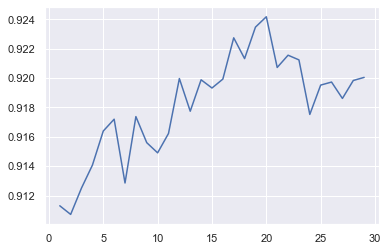

In [15]:
#Bester wert nahe beim default
min_samples_leafs = np.arange(1, 30, 1)
scores = []
best_val = 0
best_score = 0

for min_samples_leaf in min_samples_leafs:
    model = HistGradientBoostingRegressor(min_samples_leaf = min_samples_leaf)
    model.fit(X_train_sc, y_train)
    score = model.score(X_test_sc, y_test)
    scores.append(score)
    if score > best_score:
        best_score = score
        best_val = min_samples_leaf
    print(min_samples_leaf, score)

sns.lineplot(x=min_samples_leafs, y=scores)
plt.show()
print(best_score, best_val)
